<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/forces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install m3gnet alignn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.8/973.8 kB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.1/265.1 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [4]:
!wget https://raw.githubusercontent.com/usnistgov/alignn/main/alignn/examples/sample_data_ff/mlearn_data/Si/id_prop.json

--2023-04-27 01:23:12--  https://raw.githubusercontent.com/usnistgov/alignn/main/alignn/examples/sample_data_ff/mlearn_data/Si/id_prop.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1292777 (1.2M) [text/plain]
Saving to: ‘id_prop.json’

id_prop.json        100%[===================>]   1.23M  --.-KB/s    in 0.01s   

2023-04-27 01:23:13 (129 MB/s) - ‘id_prop.json’ saved [1292777/1292777]



In [5]:
from jarvis.db.jsonutils import loadjson
d = loadjson('id_prop.json')

In [31]:

from alignn.ff.ff import default_path,ForceField
from jarvis.core.atoms import Atoms
model_path = default_path()
def get_alignn_forces(atoms=[]):
    
    ff = ForceField(
        jarvis_atoms=atoms,
        model_path=model_path,
    )
    en, fs = ff.unrelaxed_atoms()
    return fs

model_path /usr/local/lib/python3.9/dist-packages/alignn/ff


In [32]:
from m3gnet.models import M3GNet, M3GNetCalculator, Potential
potential = Potential(M3GNet.load())
calculator = M3GNetCalculator(potential=potential, stress_weight=0.01)

def get_m3gnet_forces(atoms):
    atoms=atoms.ase_converter()
    atoms.calc = M3GNetCalculator(potential=potential)
    forces = atoms.get_forces()
    energy = atoms.get_potential_energy()
    return forces



In [35]:
from tqdm import tqdm
mg=[]
al = []
dat=[]
for ii,i in tqdm(enumerate(d)):
  atoms = Atoms.from_dict(i['atoms'])
  mg_f = get_m3gnet_forces(atoms)
  mg.append(np.array(mg_f).flatten())
  al_f = get_alignn_forces(atoms)
  al.append(np.array(al_f).flatten())
  dat.append(np.array(i['forces']).flatten())

0it [00:00, ?it/s]/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
14it [02:24, 10.30s/it]


KeyboardInterrupt: ignored

In [36]:
len(dat)

14

In [58]:
x = np.array(al).flatten()
y = x**2

In [59]:
x

array([ 0.00322841, -0.00138285, -0.00640063, ...,  0.00477666,
       -0.00865115,  0.00541888], dtype=float32)

In [60]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.array(dat).flatten(),np.array(al).flatten())

0.7951486109980305

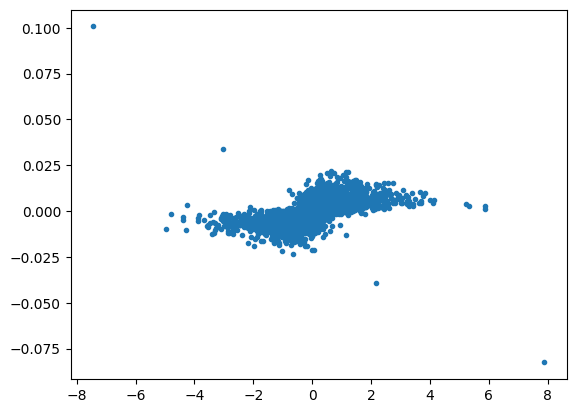

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(dat).flatten(),-1*x,'.')

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.array(dat).flatten(),np.array(mg[0:14]).flatten())

0.38519735927104665

In [40]:
len(mg)

15

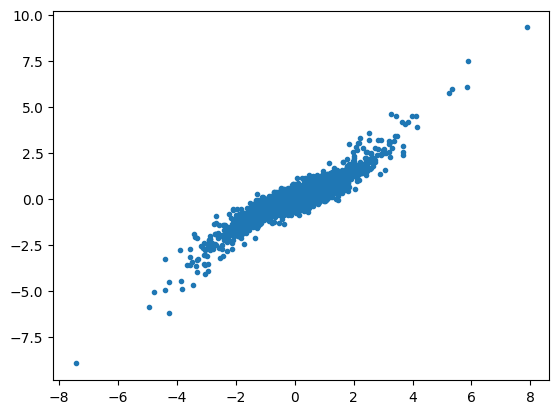

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(dat).flatten(),np.array(mg[0:14]).flatten(),'.')

In [29]:
atoms.num_atoms

63